# Payment Date Prediction 

### Project By:
- Name: Drishti.
- HRC ID: HRC60102WK
- College Name: Kalinga Institute of Industrial Technology- DU
- Submission Date: 25/02/2022


### Importing related Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sm
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import warnings
warnings.filterwarnings("ignore")
#import xgboost as xgb
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.linear_model import LinearRegression
#from sklearn.svm import SVR

### Store the dataset into the Dataframe


In [2]:
df = pd.read_csv("C:\\Users\\KIIT\\Desktop\\Internships\\HighRadius\\Dataset\\HRC60102WKdataset.csv")
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaN,2020.0,1.930797e+09,2020-04-21,20200417,20200421,20200506.0,USD,RV,1.0,NaN,3187.86,20200421.0,NAA8,1.930797e+09,1
49996,U001,0200769623,WAL-MAR co,2019-09-03 00:00:00,2019.0,1.929744e+09,2019-08-15,20190814,20190815,20190830.0,USD,RV,1.0,NaN,6766.54,20190815.0,NAH4,1.929744e+09,0
49997,U001,0200772595,SAFEW associates,2020-03-05 00:00:00,2020.0,1.930537e+09,2020-02-19,20200218,20200219,20200305.0,USD,RV,1.0,NaN,6120.86,20200219.0,NAA8,1.930537e+09,0
49998,U001,0200726979,BJ'S llc,2019-12-12 00:00:00,2019.0,1.930199e+09,2019-11-27,20191126,20191127,20191212.0,USD,RV,1.0,NaN,63.48,20191127.0,NAA8,1.930199e+09,0


### Check the shape of the dataframe


In [3]:
df.shape

(50000, 19)

### Check the Detail information of the dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

### Display All the column names

In [5]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

### Describe the entire dataset

In [6]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2.019351e+07,2.019354e+07,2.019368e+07,1.0,NaN,32337.021651,2.019354e+07,2.011340e+09,0.200000
std,0.460708,2.885235e+08,4.496041e+03,4.482134e+03,4.470614e+03,0.0,NaN,39205.975231,4.482701e+03,2.766335e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4928.312500,2.019050e+07,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17609.010000,2.019091e+07,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47133.635000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


# Data Cleaning

- Show top 5 records from the dataset

In [7]:
df.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [8]:
(df.isnull().sum()*100)/50000

business_code               0.000
cust_number                 0.000
name_customer               0.000
clear_date                 20.000
buisness_year               0.000
doc_id                      0.000
posting_date                0.000
document_create_date        0.000
document_create_date.1      0.000
due_in_date                 0.000
invoice_currency            0.000
document type               0.000
posting_id                  0.000
area_business             100.000
total_open_amount           0.000
baseline_create_date        0.000
cust_payment_terms          0.000
invoice_id                  0.012
isOpen                      0.000
dtype: float64

### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [9]:
df.loc[0:4,['invoice_id','doc_id']]

,invoice_id,doc_id
0,1.930438e+09,1.930438e+09
1,1.929646e+09,1.929646e+09
2,1.929874e+09,1.929874e+09
3,2.960623e+09,2.960623e+09
4,1.930148e+09,1.930148e+09


#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



## Check here

In [10]:
df[["baseline_create_date","document_create_date","document_create_date.1"]].corr()

,baseline_create_date,document_create_date,document_create_date.1
baseline_create_date,1.000000,0.994078,0.999527
document_create_date,0.994078,1.000000,0.994547
document_create_date.1,0.999527,0.994547,1.000000


In [11]:
df['document_create_date.1']=pd.to_datetime(df['document_create_date.1'],format='%Y%m%d')
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'],format='%Y%m%d')
df['document_create_date']=pd.to_datetime(df['document_create_date'],format='%Y%m%d')
df.loc[0:8,['document_create_date.1','document_create_date','baseline_create_date']]

,document_create_date.1,document_create_date,baseline_create_date
0,2020-01-26,2020-01-25,2020-01-26
1,2019-07-22,2019-07-22,2019-07-22
2,2019-09-14,2019-09-14,2019-09-14
3,2020-03-30,2020-03-30,2020-03-31
4,2019-11-13,2019-11-13,2019-11-13
5,2019-09-20,2019-09-20,2019-09-24
6,2019-11-01,2019-10-31,2019-11-01
7,2020-03-19,2020-03-18,2020-03-19
8,2019-06-07,2019-06-05,2019-06-07


We can see these are very similar to each other, in all the columns few dates are very same.we need to drop two of them later, just to ignore the discripencies. 

#### Please check, Column 'posting_id' is constant columns or not


#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [12]:
for cols in df.columns:   
    print(f"{cols} - {df[f'{cols}'].nunique()}")

business_code - 6
cust_number - 1425
name_customer - 4197
clear_date - 403
buisness_year - 2
doc_id - 48839
posting_date - 506
document_create_date - 507
document_create_date.1 - 506
due_in_date - 547
invoice_currency - 2
document type - 2
posting_id - 1
area_business - 0
total_open_amount - 44349
baseline_create_date - 506
cust_payment_terms - 74
invoice_id - 48833
isOpen - 2


Here we can see that there are only 1 unique value in the posting Id and IsOpen has only 2 unique values, looking at these unique values we need to drop 

### Write the code to drop all the following columns from the dataframe 

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [13]:
df = df.drop(['area_business', 'posting_id', 'invoice_id', 'document_create_date', 'isOpen', 'document type', 'document_create_date.1'], axis = 1)

### Please check from the dataframe whether all the columns are removed or not 

In [14]:
df.head(2)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200210.0,USD,54273.28,2020-01-26,NAH4
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190811.0,USD,79656.60,2019-07-22,NAD1


In [15]:
#checking if removed or not in the df_drop
if set(['area_business', 'posting_id', 'invoice_id', 'document_create_date', 'isOpen', 'document type', 'document_create_date.1']).issubset(df.columns):
    print("Columns are still there.")
else:
    print("All the columns are removed.")

All the columns are removed.


### Show all the Duplicate rows from the dataframe 

In [16]:
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,0200769623,WAL-MAR in,2019-03-12 00:00:00,2019.0,1.928870e+09,2019-02-28,20190315.0,USD,19557.41,2019-02-28,NAH4
2400,U001,0200769623,WAL-MAR trust,2019-08-28 00:00:00,2019.0,1.929758e+09,2019-08-18,20190902.0,USD,5600.41,2019-08-18,NAH4
2584,U001,0200769623,WAL-MAR corporation,2019-12-16 00:00:00,2019.0,1.930217e+09,2019-12-04,20191219.0,USD,35352.17,2019-12-04,NAH4
3755,U001,0200769623,WAL-MAR,2019-11-22 00:00:00,2019.0,1.930137e+09,2019-11-12,20191127.0,USD,2982.64,2019-11-12,NAH4
3873,CA02,0140104409,LOB associates,NaN,2020.0,2.960629e+09,2020-04-14,20200425.0,CAD,82975.82,2020-04-15,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...
49928,U001,0200915438,GROC trust,2019-08-15 00:00:00,2019.0,1.929646e+09,2019-07-25,20190809.0,USD,6969.00,2019-07-25,NAA8
49963,U001,0200759878,SA us,2019-01-29 00:00:00,2019.0,1.928614e+09,2019-01-13,20190128.0,USD,10968.24,2019-01-13,NAH4
49986,U001,0200772670,ASSOCIAT foundation,2019-06-12 00:00:00,2019.0,1.929403e+09,2019-05-29,20190613.0,USD,155837.53,2019-05-29,NAU5
49990,U001,0200765011,MAINES llc,2019-06-06 00:00:00,2019.0,1.929365e+09,2019-05-22,20190606.0,USD,4008.05,2019-05-22,NAA8


In [17]:
#df.duplicated().sum()

In [18]:
#duplicate = df[df.duplicated(subset = ['business_code', 'cust_number', 'name_customer', 'clear_date','buisness_year', 'doc_id', 'posting_date', 'due_in_date','invoice_currency', 'total_open_amount', 'baseline_create_date','cust_payment_terms'] )]
#duplicate

### Display the Number of Duplicate Rows (in duplicate)

In [19]:
rows = len(duplicate.axes[0])
print("Number of rows are: ", rows)

Number of rows are:  1161


### Drop all the Duplicate Rows

In [20]:
df.drop_duplicates(subset = ['business_code','cust_number','name_customer','clear_date','buisness_year','doc_id','posting_date','due_in_date','invoice_currency','total_open_amount','baseline_create_date','cust_payment_terms'],keep = 'last',inplace=True)

In [21]:
df.shape

(48839, 12)

#### Now check for all duplicate rows now

- Note - It must be 0 by now

In [22]:
#checking stat
duplicate_1 = df[df.duplicated()]
 
print("Duplicate Rows :")
duplicate_1

Duplicate Rows :


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms


In [23]:
rows = len(duplicate_1.axes[0])
print("Now the number of duplicated rows are: ", rows)

Now the number of duplicated rows are:  0


Above we can see there are no values in the column, hence it represents no duplicate values(rows) and we will be using dup01 fOr future processing.

### Check for the number of Rows and Columns in your dataset

In [24]:
rows = len(df.axes[0])
columns = len(df.axes[1])
print("Number of rows are: ",rows)
print("Number of columns are: ", columns)

Number of rows are:  48839
Number of columns are:  12


In [25]:
df.shape

(48839, 12)

### Find out the total count of null values in each columns

In [26]:
df.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

# Data type Conversion

### Please check the data type of each column of the dataframe

In [27]:
df.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date                      object
buisness_year                  float64
doc_id                         float64
posting_date                    object
due_in_date                    float64
invoice_currency                object
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
dtype: object

### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [28]:
print("Datatype of clear_date: ", df.dtypes['clear_date'])
print("Datatype of posting_date: ", df.dtypes['posting_date'])
print("Datatpe of due_in_date: ", df.dtypes['due_in_date'])
print("Datatype of baseline_create_data: ", df.dtypes['baseline_create_date'])

Datatype of clear_date:  object
Datatype of posting_date:  object
Datatpe of due_in_date:  float64
Datatype of baseline_create_data:  datetime64[ns]


### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [29]:
df['clear_date']=pd.to_datetime(df['clear_date'],format='%Y-%m-%d')
df['posting_date']=pd.to_datetime(df['posting_date'],format='%Y-%m-%d')
df['due_in_date']=pd.to_datetime(df['due_in_date'],format='%Y%m%d')
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'],format='%Y%m%d')

In [30]:
df.loc[0:4,['clear_date', 'posting_date', 'due_in_date','baseline_create_date']]

,clear_date,posting_date,due_in_date,baseline_create_date
0,2020-02-11,2020-01-26,2020-02-10,2020-01-26
1,2019-08-08,2019-07-22,2019-08-11,2019-07-22
2,2019-12-30,2019-09-14,2019-09-29,2019-09-14
3,NaT,2020-03-30,2020-04-10,2020-03-31
4,2019-11-25,2019-11-13,2019-11-28,2019-11-13


### Please check the datatype of all the columns after conversion of the above 4 columns

In [31]:
print("Datatype of clear_date: ", df.dtypes['clear_date'])
print("Datatype of posting_date: ", df.dtypes['posting_date'])
print("Datatpe of due_in_date: ", df.dtypes['due_in_date'])
print("Datatype of baseline_create_data: ", df.dtypes['baseline_create_date'])

Datatype of clear_date:  datetime64[ns]
Datatype of posting_date:  datetime64[ns]
Datatpe of due_in_date:  datetime64[ns]
Datatype of baseline_create_data:  datetime64[ns]


#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [32]:
df["invoice_currency"].value_counts()

USD    45011
CAD     3828
Name: invoice_currency, dtype: int64

#### display the "total_open_amount" column value

In [33]:
df["total_open_amount"].value_counts()

1897.50     101
471.56       96
1898.20      95
943.12       63
1328.25      57
           ... 
240.70        1
20541.67      1
6021.81       1
29534.23      1
677.66        1
Name: total_open_amount, Length: 44349, dtype: int64

### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [34]:
df['converted_usd']=np.where(df['invoice_currency']=='CAD',0.7*df['total_open_amount'],df['total_open_amount'])

### Display the new "converted_usd" column values

In [35]:
df['converted_usd']

0        54273.28
1        79656.60
2         2253.86
3         2309.79
4        33133.29
           ...   
49995     3187.86
49996     6766.54
49997     6120.86
49998       63.48
49999     1790.30
Name: converted_usd, Length: 48839, dtype: float64

### Display year wise total number of record 

- Note -  use "buisness_year" column for this 

In [36]:
yearwise = df.sort_values(by=['buisness_year'], ascending=False)
yearwise.loc[0:,['buisness_year','business_code', 'cust_number', 'name_customer', 'clear_date', 'doc_id', 'posting_date', 'due_in_date','invoice_currency', 'total_open_amount', 'baseline_create_date','cust_payment_terms', 'converted_usd']]

,buisness_year,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,converted_usd
0,2020.0,U001,0200769623,WAL-MAR corp,2020-02-11,1.930438e+09,2020-01-26,2020-02-10,USD,54273.28,2020-01-26,NAH4,54273.280
16736,2020.0,U001,0200706844,WINC trust,NaT,1.930687e+09,2020-03-25,2020-04-09,USD,12192.30,2020-03-25,NAA8,12192.300
38685,2020.0,U001,0200744019,TARG llc,2020-03-11,1.930566e+09,2020-02-25,2020-03-11,USD,9400.58,2020-02-25,NAA8,9400.580
38686,2020.0,U001,0200726979,BJ'S foundation,2020-01-28,1.930391e+09,2020-01-11,2020-01-26,USD,555.10,2020-01-11,NAA8,555.100
38688,2020.0,CA02,0100018048,GROUP us,NaT,2.960625e+09,2020-04-01,2020-04-13,CAD,27943.91,2020-04-03,CA10,19560.737
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19876,2019.0,CA02,0140106408,WAL-M co,2019-04-05,2.960532e+09,2019-03-04,2019-03-23,CAD,228120.84,2019-03-13,CA10,159684.588
19877,2019.0,U001,0200020431,DEC foundation,2019-03-18,1.928915e+09,2019-03-06,2019-03-24,USD,260.40,2019-03-01,NAM4,260.400
19878,2019.0,U001,0200711029,WEGMAN corporation,2019-12-16,1.930207e+09,2019-11-30,2019-12-15,USD,22730.97,2019-11-30,NAA8,22730.970
19879,2019.0,U001,0200705742,DOT llc,2019-06-10,1.929376e+09,2019-05-24,2019-06-25,USD,5219.40,2019-05-24,NA32,5219.400


In [37]:
yearwise.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'invoice_currency', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms', 'converted_usd'],
      dtype='object')

### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [38]:
df = df.drop(['invoice_currency','total_open_amount'], axis = 1)

### Write a code to check the number of columns in dataframe

In [39]:
columns = len(df.axes[1])
print("Now the number of columns are: ", columns)

Now the number of columns are:  11


# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [40]:
df.isnull().any()

business_code           False
cust_number             False
name_customer           False
clear_date               True
buisness_year           False
doc_id                  False
posting_date            False
due_in_date             False
baseline_create_date    False
cust_payment_terms      False
converted_usd           False
dtype: bool

#### Find out the number of null values from the column that you got from the above code

In [41]:
df.isnull().sum() #only cleardate has null value which ic important for the project later on

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
baseline_create_date       0
cust_payment_terms         0
converted_usd              0
dtype: int64

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

## Maindata

In [42]:
#First dataframe:: no null data in it:: train dataset
maindata = df[df.clear_date.notnull()].reset_index() #train set on non-null clear date
maindata.drop(columns=['index'],inplace=True)
maindata.head(3)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.28
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.60
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.86


## Nulldata

In [43]:
#Second dataframe:: nulldata:: contains nulldata ::test data 
nulldata = df[df.clear_date.isnull()].reset_index()
nulldata.drop(columns=['index'],inplace=True)
nulldata.head(3)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
1,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
2,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59


### Check the number of Rows and Columns for both the dataframes 

In [44]:
rows = len(maindata.axes[0])
print("Number of rows in MAINDATA is: ", rows)
columns = len(maindata.axes[1])
print("Number of columns in MAINDATA is: ", columns)

Number of rows in MAINDATA is:  39158
Number of columns in MAINDATA is:  11


In [45]:
rows = len(nulldata.axes[0])
print("Number of rows in NULLDATA is: ", rows)
columns = len(nulldata.axes[1])
print("Number of columns in NULLDATA is: ", columns)

Number of rows in NULLDATA is:  9681
Number of columns in NULLDATA is:  11


### Display the 5 records from maindata and nulldata dataframes

In [46]:
maindata.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860
3,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290
4,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088


In [47]:
nulldata.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
1,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
2,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
3,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
4,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [48]:
maindata['Delay']=maindata.loc[:,'clear_date']-maindata.loc[:,'due_in_date']
#Our model cant take in dates for prediction so our target column will not be clear_date. Instead it will be the delay column as delay will be in int format which our model can predict.
#clear_date - due_date will tell us how much delay was there in paying.
#"-" indicates it has been paid off before due date. "+" indicates it has been paid off after the due date

### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [49]:
avgdelay = maindata.groupby('name_customer')['Delay'].mean(numeric_only = False).to_dict()
avgdelay

{'11078 us': Timedelta('17 days 00:00:00'),
 '17135 associates': Timedelta('-10 days +00:00:00'),
 '17135 llc': Timedelta('-3 days +00:00:00'),
 '236008 associates': Timedelta('-3 days +00:00:00'),
 '99 CE ': Timedelta('2 days 00:00:00'),
 '99 CE associates': Timedelta('2 days 00:00:00'),
 '99 CE co': Timedelta('3 days 00:00:00'),
 '99 CE corporation': Timedelta('1 days 00:00:00'),
 '99 CE foundation': Timedelta('9 days 00:00:00'),
 '99 CE in': Timedelta('2 days 00:00:00'),
 '99 CE llc': Timedelta('3 days 00:00:00'),
 '99 CE systems': Timedelta('2 days 14:24:00'),
 '99 CE trust': Timedelta('1 days 00:00:00'),
 '99 CE us': Timedelta('1 days 00:00:00'),
 'A & W F ': Timedelta('2 days 00:00:00'),
 'A & W F associates': Timedelta('1 days 12:00:00'),
 'A & W F co': Timedelta('-5 days +12:00:00'),
 'A & W F corp': Timedelta('0 days 00:00:00'),
 'A & W F corporation': Timedelta('-1 days +09:36:00'),
 'A & W F foundation': Timedelta('1 days 08:00:00'),
 'A & W F llc': Timedelta('1 days 12:00:0

You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [50]:
maindata['avg_delay'] = maindata['name_customer'].map(avgdelay)
maindata['avg_delay']

0       -3 days +07:08:49.779837776
1                  19 days 00:00:00
2         8 days 02:10:54.545454545
3       -3 days +19:33:27.692307693
4                  71 days 10:40:00
                    ...            
39153             -1 days +14:45:00
39154   -3 days +12:40:08.540925267
39155     1 days 01:08:34.285714285
39156     1 days 13:36:42.985074626
39157   -4 days +02:20:52.173913044
Name: avg_delay, Length: 39158, dtype: timedelta64[ns]

### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [51]:
maindata['avg_delay']=maindata['avg_delay'].astype('timedelta64[s]')

### Display the maindata dataframe 

In [52]:
maindata.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,1 days,-233471.0
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3 days,1641600.0
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92 days,699054.0
3,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3 days,-188793.0
4,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,61 days,6172800.0


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [53]:
maindata = maindata.drop(['Delay','clear_date'], axis = 1)

# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [54]:
y = pd.DataFrame(maindata,columns=['avg_delay']) #target column == avg_delay

In [55]:
X = pd.DataFrame(maindata)
X = X.drop(['avg_delay'], axis = 1)

#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_loc_test, y_train, y_loc_test = train_test_split(X, y, test_size=0.4, shuffle = True, random_state = 19)

In [58]:
X_train, X_loc_test

(      business_code cust_number        name_customer  buisness_year  \
 27186          CA02  0140104331            CORE-M in         2019.0   
 12643          U001  0200769623          WAL-MAR llc         2019.0   
 32103          U001  0200726979    BJ'S  corporation         2019.0   
 35614          U001      CCU002  KRFT FDS foundation         2020.0   
 28122          U001  0200705742            DOT trust         2020.0   
 ...             ...         ...                  ...            ...   
 33811          CA02  0140106408        WAL-M systems         2019.0   
 21416          U001  0200769623        WAL-MAR trust         2019.0   
 34146          U001  0200780383                MEIJ          2019.0   
 17141          U001  0200148860     DOLLA associates         2019.0   
 10862          U001  0200776463             KROGE in         2019.0   
 
              doc_id posting_date due_in_date baseline_create_date  \
 27186  2.960538e+09   2019-03-27  2019-04-14           2019-04-

In [59]:
y_train, y_loc_test

(       avg_delay
 27186  -777600.0
 12643  -225657.0
 32103   133010.0
 35614   254400.0
 28122  -550639.0
 ...          ...
 33811   810830.0
 21416  -200193.0
 34146   150582.0
 17141   -17280.0
 10862   372600.0
 
 [23494 rows x 1 columns],
        avg_delay
 24021  -378373.0
 30595   124800.0
 9046     18000.0
 18610   196634.0
 29713   484200.0
 ...          ...
 13883  -395712.0
 9486   -194558.0
 10006  -395712.0
 24906   138240.0
 1728    204000.0
 
 [15664 rows x 1 columns])

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [60]:
print("X_train shape: {}".format(X_train.shape))
print("X_loc_test shape: {}".format(X_loc_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_loc_test shape: {}".format(y_loc_test.shape))

X_train shape: (23494, 10)
X_loc_test shape: (15664, 10)
y_train shape: (23494, 1)
y_loc_test shape: (15664, 1)


### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [61]:
X_test, X_val, y_test, y_val = train_test_split(X_loc_test, y_loc_test, test_size=0.5, random_state= 19)

### Please check for the number of rows and columns of all the 4 dataframes 

In [62]:
print("X_test shape: {}".format(X_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("y_test shape: {}".format(y_test.shape))
print("y_val shape: {}".format(y_val.shape))

X_test shape: (7832, 10)
X_val shape: (7832, 10)
y_test shape: (7832, 1)
y_val shape: (7832, 1)


# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

In [63]:
import seaborn as sns

[Text(0.5, 1.0, 'Distribution plot of TARGET VARIABLE viz avg_delay')]

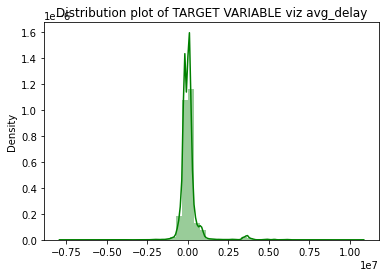

In [64]:
sns.distplot(x = maindata['avg_delay'],color = ('green') ).set(title = 'Distribution plot of TARGET VARIABLE viz avg_delay')

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [65]:
x_train = pd.DataFrame(X_train)
x_train = X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()
x_train

,name_customer,doc_id
0,11078 us,1
1,17135 associates,1
2,17135 llc,1
3,99 CE,2
4,99 CE associates,2
...,...,...
3100,YAEGER corp,1
3101,YEN BROS,1
3102,YEN BROS corp,1
3103,YEN BROS corporation,2


### You can make another distribution plot of the "doc_id" column from x_train

[Text(0.5, 1.0, 'Distribution plot of doc_id from x_train')]

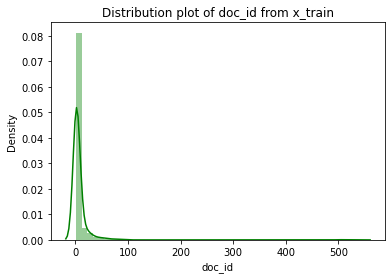

In [66]:
sns.distplot(x_train['doc_id'],color = ('green') ).set(title = 'Distribution plot of doc_id from x_train')

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


[Text(0.5, 1.0, 'Distribution plot of business_year from X_train')]

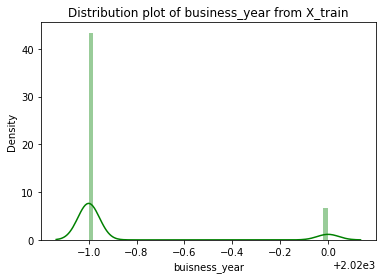

In [67]:
sns.distplot(X_train['buisness_year'],color = ('green') ).set(title = 'Distribution plot of business_year from X_train')

[Text(0.5, 1.0, 'Distribution plot of business_year and doc_id from X_train')]

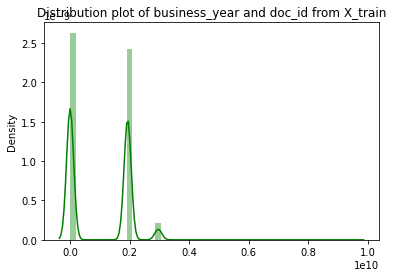

In [68]:
sns.distplot(X_train[['buisness_year','doc_id']],color = ('green')).set(title = 'Distribution plot of business_year and doc_id from X_train')

# Feature Engineering 

### Display and describe the X_train dataframe 

In [69]:
X_train.head(8)

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
27186,CA02,0140104331,CORE-M in,2019.0,2.960538e+09,2019-03-27,2019-04-14,2019-04-04,CA10,9937.333
12643,U001,0200769623,WAL-MAR llc,2019.0,1.930218e+09,2019-12-07,2019-12-22,2019-12-07,NAH4,1328.250
32103,U001,0200726979,BJ'S corporation,2019.0,1.929867e+09,2019-09-12,2019-09-27,2019-09-12,NAA8,353.360
35614,U001,CCU002,KRFT FDS foundation,2020.0,1.930475e+09,2020-02-06,2020-03-12,2020-02-06,NAG2,61334.910
28122,U001,0200705742,DOT trust,2020.0,1.930508e+09,2020-02-09,2020-03-12,2020-02-09,NA32,86641.120
14454,U001,0200886415,COSTCO in,2019.0,1.928960e+09,2019-03-19,2019-04-03,2019-03-19,NAA8,10377.600
22911,U001,200769623,WAL-MAR co,2019.0,1.929085e+09,2019-04-04,2019-04-19,2019-04-04,NAH4,28091.060
14136,U002,0100036009,JOSE foundation,2019.0,1.990570e+09,2019-11-08,2019-12-13,2019-11-08,NAG2,20726.050


In [70]:
X_train.describe()

,buisness_year,doc_id,converted_usd
count,23494.000000,2.349400e+04,23494.000000
mean,2019.131991,2.014229e+09,30673.799056
std,0.338488,2.958624e+08,36793.352634
min,2019.000000,1.928502e+09,0.790000
25%,2019.000000,1.929178e+09,4582.305000
50%,2019.000000,1.929732e+09,16894.392000
75%,2019.000000,1.930211e+09,45181.832500
max,2020.000000,9.500000e+09,668593.360000


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [71]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(X_train['business_code'])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [72]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

In [73]:
X_val['business_code_enc'] = business_coder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.transform(X_test['business_code'])

### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [74]:
X_train.loc[0:,['business_code','business_code_enc']]

,business_code,business_code_enc
0,U001,1
5894,U001,1
29068,U001,1
4263,U001,1
35136,U001,1
...,...,...
33811,CA02,0
21416,U001,1
34146,U001,1
17141,U001,1


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [75]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [76]:
X_train , X_val , X_test = custom(['business_code'])

### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [77]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [78]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [79]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [80]:
X_train ,X_val, X_test = custom(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [81]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

In [82]:
X_train ,X_val, X_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [83]:
X_train.dtypes

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [84]:
X_val.dtypes

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [85]:
X_test.dtypes

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [86]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year

### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [87]:
X_train ,X_val, X_test = custom(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [88]:
X_train['day_of_createdate'] = X_train['baseline_create_date'].dt.day
X_train['month_of_createdate'] = X_train['baseline_create_date'].dt.month
X_train['year_of_createdate'] = X_train['baseline_create_date'].dt.year

X_val['day_of_createdate'] = X_val['baseline_create_date'].dt.day
X_val['month_of_createdate'] = X_val['baseline_create_date'].dt.month
X_val['year_of_createdate'] = X_val['baseline_create_date'].dt.year


X_test['day_of_createdate'] = X_test['baseline_create_date'].dt.day
X_test['month_of_createdate'] = X_test['baseline_create_date'].dt.month
X_test['year_of_createdate'] = X_test['baseline_create_date'].dt.year

### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [89]:
X_train ,X_val, X_test = custom(['baseline_create_date'])

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [90]:
X_train['day_of_due'] = X_train['due_in_date'].dt.day
X_train['month_of_due'] = X_train['due_in_date'].dt.month
X_train['year_of_due'] = X_train['due_in_date'].dt.year

X_val['day_of_due'] = X_val['due_in_date'].dt.day
X_val['month_of_due'] = X_val['due_in_date'].dt.month
X_val['year_of_due'] = X_val['due_in_date'].dt.year


X_test['day_of_due'] = X_test['due_in_date'].dt.day
X_test['month_of_due'] = X_test['due_in_date'].dt.month
X_test['year_of_due'] = X_test['due_in_date'].dt.year

pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [91]:
X_train ,X_val, X_test = custom(['due_in_date'])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [92]:
X_train.dtypes

cust_number                 int32
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int32
name_customer_enc           int32
cust_payment_terms_enc      int32
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

In [93]:
X_test.dtypes

cust_number                 int32
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int32
name_customer_enc           int32
cust_payment_terms_enc      int32
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

In [94]:
X_val.dtypes

cust_number                 int32
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int32
name_customer_enc           int32
cust_payment_terms_enc      int32
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [95]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

16

- Note - Keep the code as it is, no need to change 


In [96]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [97]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [98]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [99]:
train=X_train.copy()
handling_correlation(train.copy(),0.85)

['year_of_createdate',
 'month_of_createdate',
 'day_of_createdate',
 'month_of_due',
 'year_of_due',
 'year_of_postingdate']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

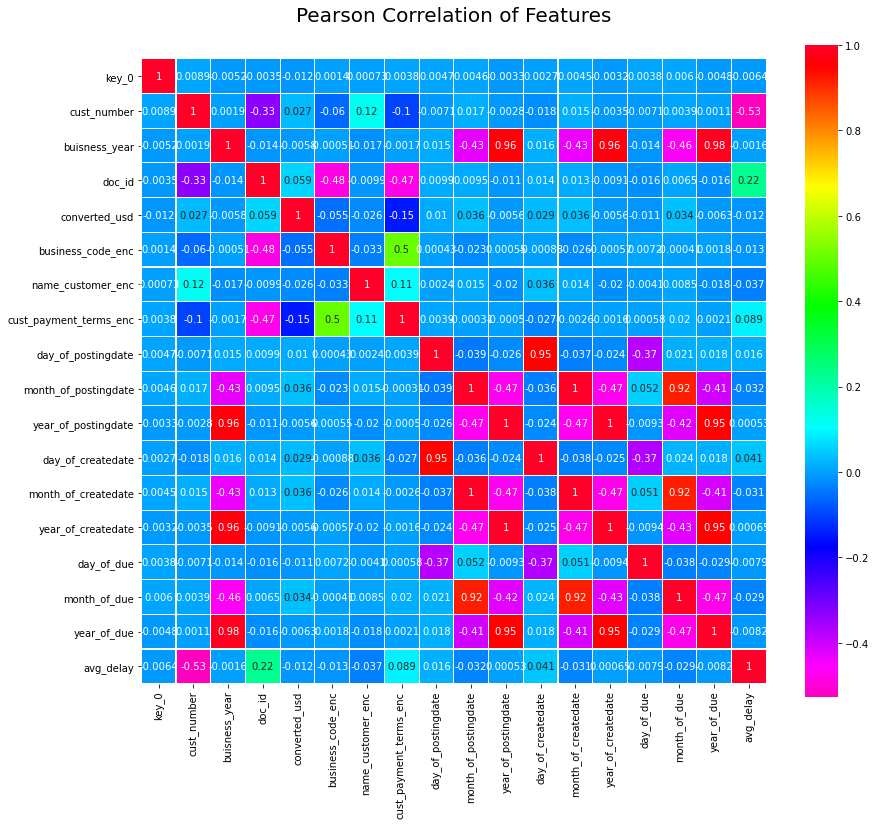

In [100]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [101]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [102]:
sel.variances_

array([1.81589408e+15, 1.14569484e-01, 8.75308245e+16, 1.35369318e+09,
       3.01159716e-01, 1.07968431e+06, 1.37310956e+02, 7.58917382e+01,
       1.22750819e+01, 1.15818852e-01, 7.78123051e+01, 1.22862596e+01,
       1.15979015e-01, 7.60405521e+01, 1.20867434e+01, 1.17544576e-01])

### Features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [103]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [104]:
print("X_test shape: {}".format(X_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("X_train shape: {}".format(X_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("y_val shape: {}".format(y_val.shape))
print("y_train shape: {}".format(y_train.shape))

X_test shape: (7832, 16)
X_val shape: (7832, 16)
X_train shape: (23494, 16)
y_test shape: (7832, 1)
y_val shape: (7832, 1)
y_train shape: (23494, 1)


In [105]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [106]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [107]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

516030.6366599126

### Display The Comparison Lists

In [108]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[285543498378.3167],[0.36113492428586236],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [109]:
from sklearn.svm import SVR
Algorithm.append('SVR')
regressor = SVR()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [110]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [111]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

636051.0100086322

### Display The Comparison Lists

In [112]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SVR'],[285543498378.3167, 450691484949.76215],[0.36113492428586236, -0.008361427563190249],

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [113]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('DecisionTreeRegressor')
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [114]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [115]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

425734.5582137005

### Display The Comparison Lists

In [116]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SVR', 'DecisionTreeRegressor'],[285543498378.3167, 450691484949.76215, 242156978050.21054],[0.36113492428586236, -0.008361427563190249, 0.45820641339980717],

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [117]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('RandomForestRegressor')
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [118]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [119]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

300511.3672482532

### Display The Comparison Lists


In [120]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SVR', 'DecisionTreeRegressor', 'RandomForestRegressor'],[285543498378.3167, 450691484949.76215, 242156978050.21054, 101534214421.88383],[0.36113492428586236, -0.008361427563190249, 0.45820641339980717, 0.7728308858278733],

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [121]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [122]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [123]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

296246.23300377844

### Display The Comparison Lists


In [124]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SVR', 'DecisionTreeRegressor', 'RandomForestRegressor', 'XGB Regressor'],[285543498378.3167, 450691484949.76215, 242156978050.21054, 101534214421.88383, 93230553605.94574],[0.36113492428586236, -0.008361427563190249, 0.45820641339980717, 0.7728308858278733, 0.7914092072605341],

## You need to make the comparison list into a comparison dataframe 

In [125]:
comparison = pd.DataFrame({'Algorithm' : Algorithm, 'MSE_Score' : MSE_Score, 'R2_Score' : R2_Score})
comparison 

,Algorithm,MSE_Score,R2_Score
0,LinearRegression,2.855435e+11,0.361135
1,SVR,4.506915e+11,-0.008361
2,DecisionTreeRegressor,2.421570e+11,0.458206
3,RandomForestRegressor,1.015342e+11,0.772831
4,XGB Regressor,9.323055e+10,0.791409


## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [126]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [127]:
mean_squared_error(y_test,predictedfinal,squared=False)

305336.78718088614

### Calculate the mean Square Error for validation dataset

In [128]:
mean_squared_error(y_val,predictedfinal,squared=False)

876930.5409722985

### Calculate the R2 score for test

In [129]:
r2_score(y_test,predict_testfinal)

-0.7520740123157559

### Calculate the R2 score for Validation

In [130]:
r2_score(y_val,predict_testfinal)

0.7817418276034571

### Calculate the Accuracy for train Dataset 

In [131]:
regressorfinal.score(X_train, y_train)

0.9527229009989021

### Calculate the accuracy for validation

In [132]:
regressorfinal.score(X_val, y_val)

0.7817418276034571

### Calculate the accuracy for test

In [133]:
regressorfinal.score(X_test, y_test)

0.7914092072605341

# Specify the reason behind choosing your machine learning model 

<font color=red>We are choosing xgboost. Why?</font>

1. It has a lower Mean squared error. MSE is used to check how close estimates or forecasts are to actual values. Lower the    MSE, the closer is forecast to actual. This is used as a model evaluation measure for regression models and the lower      value indicates a better fit.
<div>
<img src="https://user-images.githubusercontent.com/84791003/155658909-d3d35042-b1bc-4396-a6b0-18fcbe89e478.png" width="360"/>
</div>
<font color=pink>....................................................................................................</font>
2. It has a higher R2 score, and higher r-squared indicates a better fit for the model
<div>
<img src="https://user-images.githubusercontent.com/84791003/155659115-da1241a9-c1ac-4792-88ad-69e8a0b02d06.png" width="360"/>
</div>

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

In [134]:
nulldata.head(8)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.790
1,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.020
2,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.590
3,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.650
4,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.060
5,U001,0200744019,TARG associates,NaT,2020.0,1.930676e+09,2020-03-21,2020-04-05,2020-03-21,NAA8,5893.010
6,CA02,0140106408,WAL-M corp,NaT,2020.0,2.960619e+09,2020-03-06,2020-03-16,2020-03-06,CA10,64982.589
7,U001,0200337148,COAS llc,NaT,2020.0,1.930592e+09,2020-03-02,2020-03-17,2020-03-02,NAA8,11380.830


### Check for the number of rows and columns in the nulldata

In [135]:
nulldata.shape

(9681, 11)

### Check the Description and Information of the nulldata 

In [136]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9681 entries, 0 to 9680
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         9681 non-null   object        
 1   cust_number           9681 non-null   object        
 2   name_customer         9681 non-null   object        
 3   clear_date            0 non-null      datetime64[ns]
 4   buisness_year         9681 non-null   float64       
 5   doc_id                9681 non-null   float64       
 6   posting_date          9681 non-null   datetime64[ns]
 7   due_in_date           9681 non-null   datetime64[ns]
 8   baseline_create_date  9681 non-null   datetime64[ns]
 9   cust_payment_terms    9681 non-null   object        
 10  converted_usd         9681 non-null   float64       
dtypes: datetime64[ns](4), float64(3), object(4)
memory usage: 832.1+ KB


### Storing the Nulldata into a different dataset 
# for BACKUP

In [137]:
backnulldata = nulldata.copy()

### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [138]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [139]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

In [140]:
nulldata['day_of_cleardate'] = nulldata['clear_date'].dt.day
nulldata['month_of_cleardate'] = nulldata['clear_date'].dt.month
nulldata['year_of_cleardate'] = nulldata['clear_date'].dt.year

nulldata['day_of_postingdate'] = nulldata['posting_date'].dt.day
nulldata['month_of_postingdate'] = nulldata['posting_date'].dt.month
nulldata['year_of_postingdate'] = nulldata['posting_date'].dt.year

nulldata['day_of_due'] = nulldata['due_in_date'].dt.day
nulldata['month_of_due'] = nulldata['due_in_date'].dt.month
nulldata['year_of_due'] = nulldata['due_in_date'].dt.year

nulldata['day_of_createdate'] = nulldata['baseline_create_date'].dt.day
nulldata['month_of_createdate'] = nulldata['baseline_create_date'].dt.month
nulldata['year_of_createdate'] = nulldata['baseline_create_date'].dt.year

### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [141]:
nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc']=label_encoder.transform(nulldata['name_customer'])


### Check for the datatypes of all the columns of Nulldata

In [142]:
nulldata.dtypes

business_code                     object
cust_number                        int32
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
cust_payment_terms                object
converted_usd                    float64
business_code_enc                  int32
day_of_cleardate                 float64
month_of_cleardate               float64
year_of_cleardate                float64
day_of_postingdate                 int64
month_of_postingdate               int64
year_of_postingdate                int64
day_of_due                         int64
month_of_due                       int64
year_of_due                        int64
day_of_createdate                  int64
month_of_createdate                int64
year_of_createdate                 int64
cust_payment_ter

### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [143]:
nulldata = nulldata.drop(['business_code',"baseline_create_date","due_in_date","posting_date","name_customer","clear_date","cust_payment_terms",'day_of_cleardate',"month_of_cleardate","year_of_cleardate"], axis = 1)

### Check the information of the "nulldata" dataframe

In [144]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9681 entries, 0 to 9680
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9681 non-null   int32  
 1   buisness_year           9681 non-null   float64
 2   doc_id                  9681 non-null   float64
 3   converted_usd           9681 non-null   float64
 4   business_code_enc       9681 non-null   int32  
 5   day_of_postingdate      9681 non-null   int64  
 6   month_of_postingdate    9681 non-null   int64  
 7   year_of_postingdate     9681 non-null   int64  
 8   day_of_due              9681 non-null   int64  
 9   month_of_due            9681 non-null   int64  
 10  year_of_due             9681 non-null   int64  
 11  day_of_createdate       9681 non-null   int64  
 12  month_of_createdate     9681 non-null   int64  
 13  year_of_createdate      9681 non-null   int64  
 14  cust_payment_terms_enc  9681 non-null   

### Compare "nulldata" with the "X_test" dataframe 

- use info() method

In [145]:
nulldata.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9681 entries, 0 to 9680
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9681 non-null   int32  
 1   buisness_year           9681 non-null   float64
 2   doc_id                  9681 non-null   float64
 3   converted_usd           9681 non-null   float64
 4   business_code_enc       9681 non-null   int32  
 5   day_of_postingdate      9681 non-null   int64  
 6   month_of_postingdate    9681 non-null   int64  
 7   year_of_postingdate     9681 non-null   int64  
 8   day_of_due              9681 non-null   int64  
 9   month_of_due            9681 non-null   int64  
 10  year_of_due             9681 non-null   int64  
 11  day_of_createdate       9681 non-null   int64  
 12  month_of_createdate     9681 non-null   int64  
 13  year_of_createdate      9681 non-null   int64  
 14  cust_payment_terms_enc  9681 non-null   

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [146]:
X_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due'],
      dtype='object')

In [147]:
nulldata.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_due', 'month_of_due', 'year_of_due',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

In [148]:
nulldata2=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due']]

### Display the Final Dataset

In [149]:
nulldata2.head(8)

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_createdate,month_of_createdate,year_of_createdate,day_of_due,month_of_due,year_of_due
0,140105686,2020.0,2.960623e+09,2309.790,65,2716,4,30,3,2020,31,3,2020,10,4,2020
1,200744019,2020.0,1.930659e+09,11173.020,65,2800,18,19,3,2020,19,3,2020,3,4,2020
2,200418007,2020.0,1.930611e+09,3525.590,65,93,18,11,3,2020,11,3,2020,26,3,2020
3,200739534,2020.0,1.930788e+09,121105.650,65,2023,18,15,4,2020,15,4,2020,30,4,2020
4,200353024,2020.0,1.930817e+09,3726.060,65,738,34,23,4,2020,16,4,2020,26,4,2020
5,200744019,2020.0,1.930676e+09,5893.010,65,2791,18,21,3,2020,21,3,2020,5,4,2020
6,140106408,2020.0,2.960619e+09,64982.589,65,2993,4,6,3,2020,6,3,2020,16,3,2020
7,200337148,2020.0,1.930592e+09,11380.830,65,567,18,2,3,2020,2,3,2020,17,3,2020


### Now you can pass this dataset into you final model and store it into "final_result"

In [150]:
final_result = regressorfinal.predict(nulldata2)

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [151]:
final_result = pd.Series(final_result,name='avg_delay')

### Display the "avg_delay" column

In [152]:
maindata['avg_delay']

0        -233471.0
1        1641600.0
2         699054.0
3        -188793.0
4        6172800.0
           ...    
39153     -33300.0
39154    -213592.0
39155      90514.0
39156     135402.0
39157    -337148.0
Name: avg_delay, Length: 39158, dtype: float64

### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [153]:
backnulldata.reset_index(drop=True,inplace=True)
Final = backnulldata.merge(final_result , on = nulldata.index )

### Display the "Final" dataframe 

In [154]:
Final.head(5)

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,0,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,3.440908e+05
1,1,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02,8.142053e+05
2,2,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59,2.366072e+06
3,3,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65,-9.437563e+04
4,4,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06,-2.553316e+05


### Check for the Number of Rows and Columns in your "Final" dataframe 

In [155]:
rows = len(Final.axes[0])
print("Number of rows are: ", rows)
columns = len(Final.axes[1])
print("Number of columns are: ", columns)

Number of rows are:  9681
Number of columns are:  13


### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [156]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

### Display the "clear_date" column

In [157]:
Final['clear_date'].head(5)

0   2020-04-13 23:34:50.750000000
1   2020-04-12 10:10:05.312500000
2   2020-04-22 09:14:31.500000000
3   2020-04-28 21:47:04.367187500
4   2020-04-23 01:04:28.390625000
Name: clear_date, dtype: datetime64[ns]

### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [158]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

### Display the "avg_delay" column 

In [159]:
Final['avg_delay'].head(5)

0     3.0
1     9.0
2    27.0
3    -2.0
4    -3.0
Name: avg_delay, dtype: float64

### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [160]:
bins= [-100,0,15,30,45,60,100]
labels =['already cleared','0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [161]:
Final = Final.drop(['key_0','avg_delay'],axis = 1)

### Display the count of each categoty of new "Aging Bucket" column 

In [162]:
Final["Aging Bucket"].value_counts()

0-15               6378
already cleared    2616
16-30               474
31-45               145
46-60                65
Greatar than 60       3
Name: Aging Bucket, dtype: int64

### Display your final dataset with aging buckets 

In [163]:
Final.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Aging Bucket
0,CA02,0140105686,SYSC llc,2020-04-13 23:34:50.750000000,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,0-15
1,U001,0200744019,TARG us,2020-04-12 10:10:05.312500000,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02,0-15
2,U001,0200418007,AM,2020-04-22 09:14:31.500000000,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59,16-30
3,U001,0200739534,OK systems,2020-04-28 21:47:04.367187500,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65,already cleared
4,U001,0200353024,DECA corporation,2020-04-23 01:04:28.390625000,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06,already cleared


### Store this dataframe into the .csv format

In [164]:
Final.to_csv("C:\\Users\\KIIT\\Desktop\\Internships\\HighRadius\\HRC60102WK_Drishti.csv")

# END OF THE PROJECT